In [ ]:
# Libraries for Feature Engineering
import seaborn as sns

In [ ]:
# Libraries for Data Structures
import pandas as pd
import numpy as np

In [ ]:
# Libraries for Creating Pipelines
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [ ]:
# Libraries for Data Pre-processing and Processing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
# Libraries For Model Formation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# Libraries for Model Evaluation
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score, classification_report


# Dataset Customisation

In [ ]:
# Importing Dataset from csv file
raw_data = pd.read_csv('/datasets/dengue.csv')

# Gives total no.of rows and columns
raw_data.shape

(980, 10)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     980 non-null    object
 1   Age        980 non-null    int64 
 2   NS1        980 non-null    int64 
 3   IgG        980 non-null    int64 
 4   IgM        980 non-null    int64 
 5   Area       980 non-null    object
 6   AreaType   980 non-null    object
 7   HouseType  980 non-null    object
 8   District   980 non-null    object
 9   Outcome    980 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 76.7+ KB


## ***DataSet Columns Defination***

```
1. Gender: Gender of the survey respondent.
2. Age: Age of the survey respondent.
3. NS1: NS1 test's data positive as 1 negative as 0.
4. IgG: IgG data positive as 1 negative as 0.
5. IgM: IgM data positive as 1 negative as 0.
6. Area: The area within the Dhaka region where the respondent resides.
7. Area Type: Classification of the area as "Developed" or "Undeveloped."
8. House Type: The type of housing in the area, e.g., "Building," "Tin-Shed," or "Others."
9. District: The specific district within Dhaka.
10. Outcome: Outcome variable indicating the presence (1) or absence (0) of Dengue cases reported.
    
```



# Feature Engineering

## Feature Selection

<ipython-input-9-43c298583b53>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = raw_data.corr()


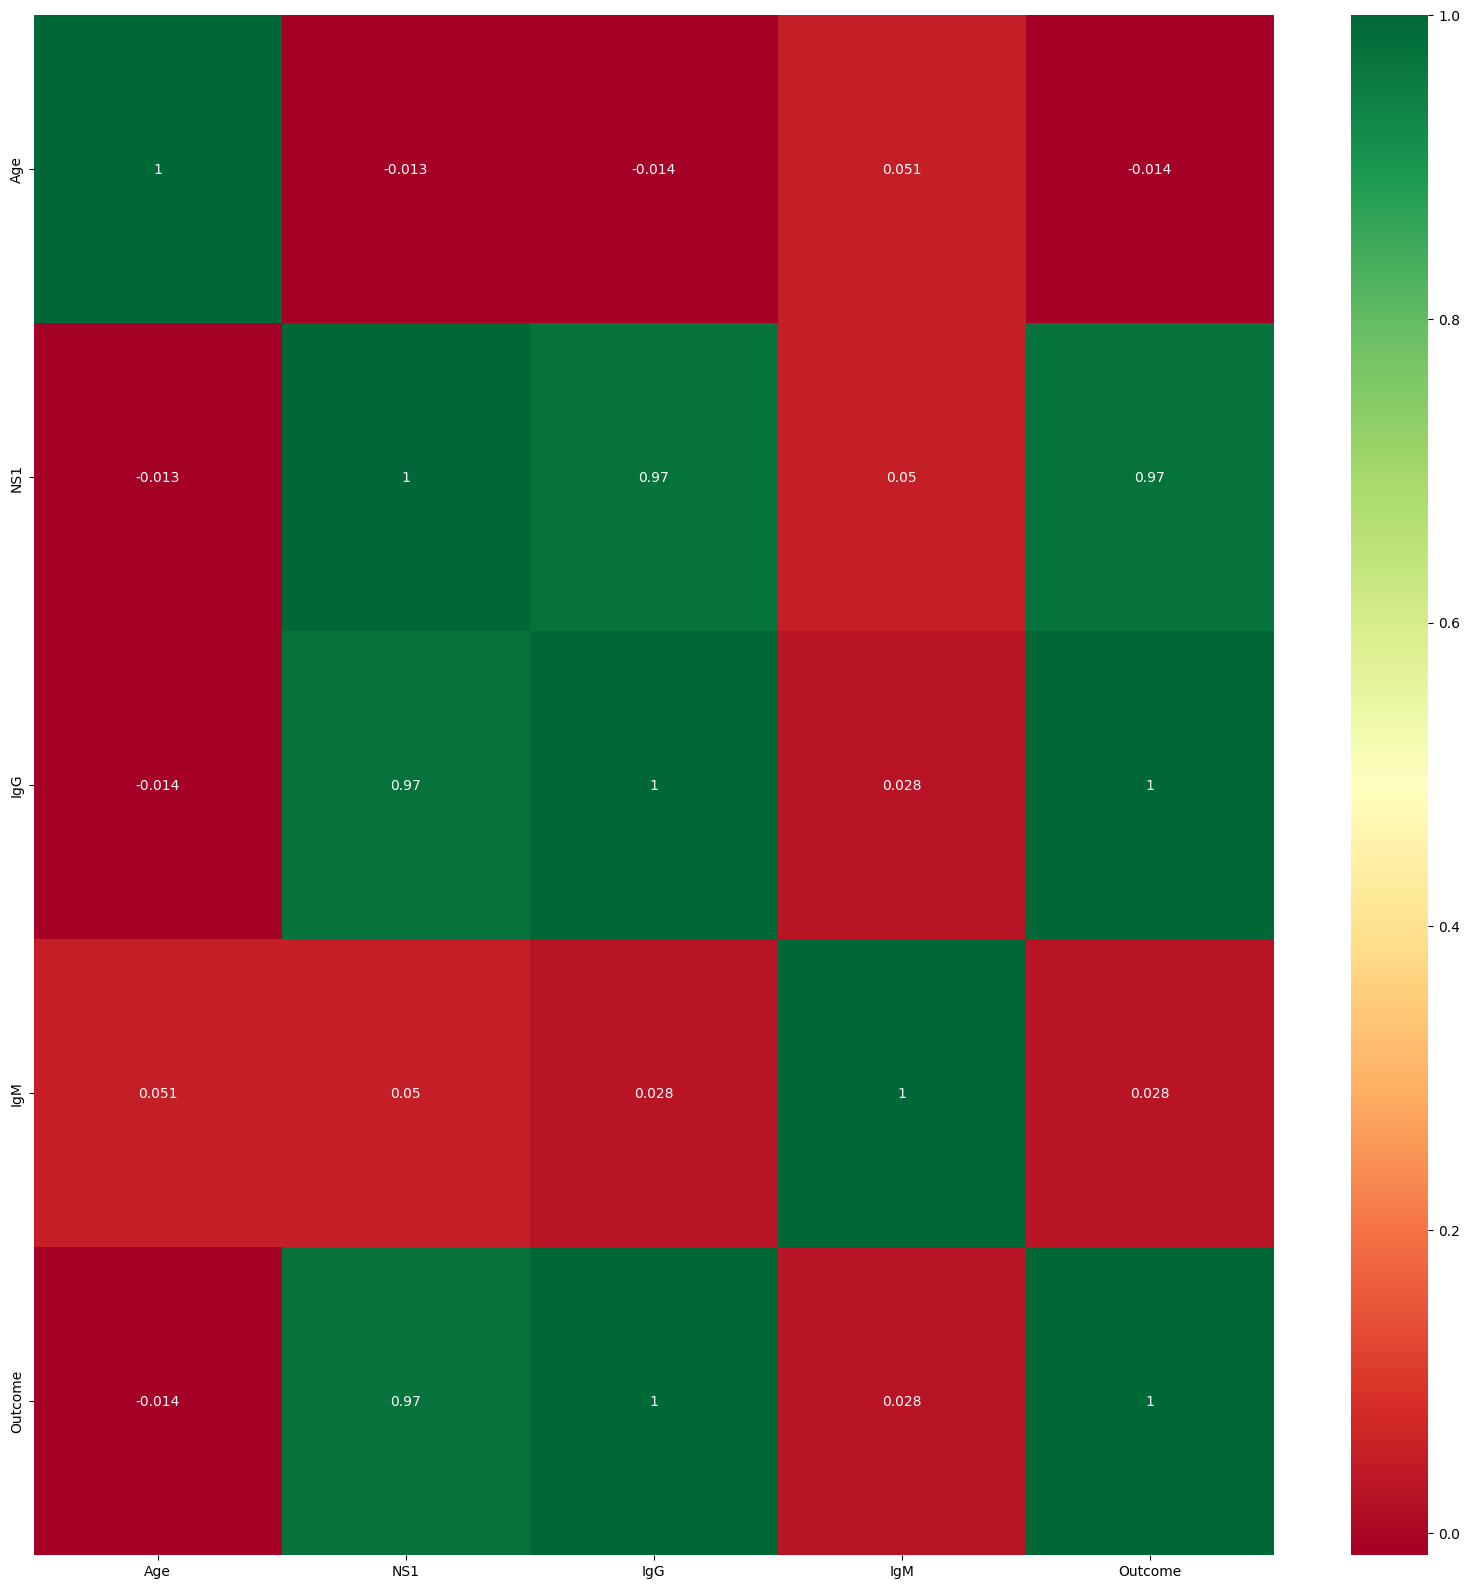

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = raw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(raw_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Dropping Non-Required Featues

In [ ]:
raw_data['AreaType'].value_counts()

Developed      492
Undeveloped    488
Name: AreaType, dtype: int64

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     980 non-null    object
 1   Age        980 non-null    int64 
 2   NS1        980 non-null    int64 
 3   IgG        980 non-null    int64 
 4   IgM        980 non-null    int64 
 5   Area       980 non-null    object
 6   AreaType   980 non-null    object
 7   HouseType  980 non-null    object
 8   District   980 non-null    object
 9   Outcome    980 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 76.7+ KB


## Converting Category into Numerical Values

In [ ]:
# Converting Categorical Values to String
raw_data['Gender'] = pd.factorize(raw_data.Gender)[0]
raw_data['Area'] = pd.factorize(raw_data.Area)[0]
raw_data['AreaType'] = pd.factorize(raw_data.AreaType)[0]
raw_data['HouseType'] = pd.factorize(raw_data.HouseType)[0]
raw_data['District'] = pd.factorize(raw_data.District)[0]
# raw_data.drop(['Gender', 'District', 'AreaType'], axis=1, inplace=True)

raw_data = raw_data[top_corr_features]

# Converting Target Variables to Binary Target Values
raw_data['Outcome'].value_counts()

1    527
0    453
Name: Outcome, dtype: int64

# Dataset Pre-Processing and Processing

In [ ]:
# Separate labels and features
X = raw_data.drop(['Outcome'], axis=1)
y = raw_data['Outcome']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_scaled)

# Data Augmentation
smote = SMOTE(random_state=42)
X_imputed_smote, y_smote = smote.fit_resample(X_imputed, y)

# Now, use StratifiedShuffleSplit for splitting the data
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.4, random_state=42)

# Split the data
for train_index, test_index in sss.split(X_imputed_smote, y_smote):
    X_train, X_test = X_imputed_smote[train_index], X_imputed_smote[test_index]
    y_train, y_test = y_smote.iloc[train_index], y_smote.iloc[test_index]

# Model Formations

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [25, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print(f"{best_rf_model} CV Accuracy: {np.mean(cv_scores) * 100:.2f}%")

# Fit the model on the entire dataset
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_rf_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_rf_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

RandomForestClassifier(n_estimators=25, random_state=42) CV Accuracy: 100.00%
-------------------------------------------------------
RandomForestClassifier(n_estimators=25, random_state=42) Training Accuracy: 100.00%
-------------------------------------------------------
RandomForestClassifier(n_estimators=25, random_state=42) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

-------------------------------------------------------


In [ ]:
# LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'num_leaves': [31, 50, 100]}
lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5)
lgbm_grid.fit(X_train, y_train)
best_lgbm_model = lgbm_grid.best_estimator_

# Fit the model on the entire dataset
best_lgbm_model.fit(X_train, y_train)
y_pred = best_lgbm_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_lgbm_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_lgbm_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive g

In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb_model = gb_grid.best_estimator_

# Fit the model on the entire dataset
best_gb_model.fit(X_train, y_train)
y_pred = best_gb_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_gb_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_gb_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

-------------------------------------------------------
GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state=42) Training Accuracy: 100.00%
-------------------------------------------------------
GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state=42) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

-------------------------------------------------------


In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10], 'subsample': [0.8, 1.0]}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_

# Fit the model on the entire dataset
best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_xgb_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_xgb_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

-------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) Training Accuracy: 100.00%
-------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_by

In [ ]:

# Support Vector Classifier
svc_model = make_pipeline(StandardScaler(), SVC(random_state=42, probability=True))
svc_params = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(svc_model, svc_params, cv=5)
svc_grid.fit(X_train, y_train)
best_svc_model = svc_grid.best_estimator_

# Fit the model on the entire dataset
best_svc_model.fit(X_train, y_train)
y_pred = best_svc_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_svc_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_svc_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))]) Training Accuracy: 100.00%
-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))]) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

-------------------------------------------------------


In [ ]:

# MLP Classifier
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(random_state=42))
mlp_params = {'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50)], 'mlpclassifier__alpha': [0.0001, 0.001, 0.01]}
mlp_grid = GridSearchCV(mlp_model, mlp_params, cv=5)
mlp_grid.fit(X_train, y_train)
best_mlp_model = mlp_grid.best_estimator_

# Fit the model on the entire dataset
best_svc_model.fit(X_train, y_train)
y_pred = best_svc_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_svc_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_svc_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))]) Training Accuracy: 100.00%
-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))]) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       211

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

-------------------------------------------------------


In [ ]:
# KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')


Accuracy : 100.0


In [ ]:
# Logistic Regression
logistic_regression = LogisticRegression(C = 0.2)
logistic_regression_model = logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 100.0


In [ ]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 100.0


In [ ]:
# Random Forest Classifier
random_forest = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 100.0


In [ ]:
# Support Vector Machines
svc_model = SVC(gamma='auto').fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 100.0
